**ÍNDICE DE CONTENIDOS**

1. [Ejercicio 1: Problema de regresión múltiple para predecir la probabilidad de abandono de un banco](#topic1)
2. [Ejercicio 2: Problema de clasificación multiclase de diferentes especies de flores](#topic2)
3. [Ejercicio 3: Problema de clasificación multiclase de diferentes artículos de ropa y calzado](#topic3)



# 01 Ejercicio: Problema de modelización de la pérdida de clientes  <a id="topic1"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En este ejercicio tomaremos como punto de partida el caso visto en el Notebook '02_Introducción a las RNA en TensorFlow 2.0'. Partiendo del mismo conjunto de datos, una muestra de 10.000 clientes, programar una estructura de red neuronal artificial con 4 capas ocultas y 3 capas dropout utilizando el proceso de validación cruzada k-fold en la etapa de entrenamiento con el objetivo de identificar si tenemos problemas de sesgo y/o varianza. El resto de parámetros son los que aparecen fijados aunque podéis modificarlos para ver cómo varían los resultados.

Recordad que las fases básicas para implementar dicho algoritmo de aprendizaje profundo son las siguientes:

1. Procesado datos entrada red neuronal artificial
2. Definición del modelo de red neuornal artificial
3. Configuración del proceso de aprendizaje de una RNA
4. Entrenamiento del modelo de red neuronal artificial
5. Evaluación del modelo de red neuronal artificial

**01 Solución ejercicio: Problema de modelización de la pérdida de clientes**

In [1]:
# Tenemos que instalar unas dependencias previamente (tenemos que hacerlo en cada sesión que queramos utilizar la librería scikeras)

%pip install keras scikeras pandas scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: c:\Users\diego\.pyenv\pyenv-win\versions\3.10.11\python.exe -m pip install --upgrade pip


In [2]:
# Importamos las librerías necesarias para realizar dicho ejercicio
import keras
import scikeras
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

In [3]:
# Sincronizamos Google Colab con Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# VOY A TRABAJAR EN LOCAL DADO QUE DISPONGO DE UN EQUIPO CON BUENA CAPACIDAD DE CÓMPUTO

In [4]:
# Cargamos el conjunto de datos
#dataset = pd.read_csv('/content/drive/My Drive/Churn_Modelling.csv')
dataset = pd.read_csv('Churn_Modelling.csv')    

In [5]:
# Definimos las variables independientes
x = dataset.iloc[:, 3:13].values

In [6]:
# Definimos la variable que queremos explicar (dependiente)
y = dataset.iloc[:, 13].values

In [7]:
# Realizamos la transformación para cada una de las variables que nos interesan
# Transformación de la columna 1 (país) en variable dummy
labelencoder_x_1 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])

# Comprobamos que se ha realizado correctamente
x

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [8]:
# Cuando estamos considerando más de 3 categorías y queremos crear variables dummmies
# para no caer en problemas de multicolinealidad debido al exceso de variables creadas artificialmente
# tenemos que eliminar siempre 1 columna. Para ello utilizaremos las funciones OneHotEncoder y ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("Churn_Modelling",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [1]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)

x = transformer.fit_transform(x) # aplicamos la función transformer
x = x[:, 1:] # eliminamos la columna 1º

# Comprobamos que se ha realizado correctamente
x[:, 0:3]

array([[0.0, 0.0, 619],
       [0.0, 1.0, 608],
       [0.0, 0.0, 502],
       ...,
       [0.0, 0.0, 709],
       [1.0, 0.0, 772],
       [0.0, 0.0, 792]], dtype=object)

In [9]:
# Transformación de la columna 2 (género) en variable dummy
labelencoder_x_2 = LabelEncoder()
x[:, 3] = labelencoder_x_2.fit_transform(x[:, 3])

In [10]:
# Definimos los conjuntos de train-test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
# Estandarizamos las variables con la función StandardScaler
sc_x = StandardScaler()

# Variables independientes entrenamiento estandarizadas
x_train = sc_x.fit_transform(x_train)


In [12]:
# Variables independientes testing estandarizadas
x_test = sc_x.transform(x_test)

In [13]:
# Creamos una función para implementar la estructura de RNA con k-fold cv
def build_rna():

  # Inicializamos la RNA con la función Sequential
  rna = Sequential()

  # Añadimos las capas de entrada y una primera capa oculta utilizando la función Dense
  rna.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu", input_dim = 11))
  # Añadimos una segunda capa oculta
  rna.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))
  # Añadimos una primera capa de dropout
  rna.add(Dropout(rate = 0.1))
  # Añadimos una tercera capa oculta
  rna.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))
  # Añadimos una segunda capa de dropout
  rna.add(Dropout(rate = 0.2))
  # Añadimos una cuarta capa oculta
  rna.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))
  # Añadimos una tercera capa de dropout
  rna.add(Dropout(rate = 0.3))
  # Finalmente añadimos la capa de salida
  rna.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
  # Compilamos la RNA y unimos todos los nodos y capas
  rna.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

  # Devolver la RNA
  return rna

In [14]:
# Preparamos la RNA al conjunto de entrenamiento para poder utilizar el k-fold cv
rna = KerasClassifier(build_fn = build_rna, batch_size = 50, epochs = 100)

In [15]:
# Aplicación del k-fold cv sobre nuestro conjunto de entrenamiento utilizando la RNA definida
accuracies = cross_val_score(estimator=rna, X = x_train, y = y_train, cv = 10, n_jobs=-1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.3s finished


In [16]:
# Obtenemos el vector con los resultados de las precisiones
accuracies

array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625, 0.79625, 0.79625,
       0.79625, 0.795  , 0.795  ])

In [17]:
# Obtenemos la media y la varianza del promedio de las precisiones
# En cuál de los 4 gráficos sesgo-varianza nos encontramos??
mean = accuracies.mean()
variance = accuracies.std()
print(mean)
print(variance)

0.796
0.0004999999999999894


# 02 Ejercicio: Problema de clasificación multiclase de diferentes especies de flores <a id="topic2"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En este ejercicio utilizaremos el conjunto de datos de flores denominado *iris* que utilizamos también en la asignatura de análisis estadístico. Este conjunto de datos está bien estudiado y es un buen problema para practicar con redes neuronales ya que las 4 variables de entrada son numéricas y tienen la misma escala en centímetros. Cada observación describe las propiedades de las medidas de una flor observada y la variable de salida será la especie específica de iris.

Se trata de un problema de clasificación multiclase, lo que significa que hay más de dos clases que predecir, de hecho, vamos a considerar tres especies de flores. Se trata de un tipo de problema importante en el que practicar con redes neuronales porque los valores de las tres clases requieren un manejo especializado. El objetivo será proponer la estructura de una red neuronal artificial que proporcione una precisión elevada del conjunto de prueba (> 85%).

**02 Solución ejercicio: Problema de clasificación multiclase de diferentes especies de flores**

In [18]:
# Tenemos que instalar unas dependencias previamente (tenemos que hacerlo en cada sesión que queramos utilizar la librería scikeras)
%pip install keras scikeras pandas scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: c:\Users\diego\.pyenv\pyenv-win\versions\3.10.11\python.exe -m pip install --upgrade pip


In [19]:
# Importamos las librerías necesarias para realizar dicho ejercicio
import scikeras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [20]:
# Sincronizamos Google Colab con Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [21]:
# Cargamos el conjunto de datos
#dataset = pd.read_csv('/content/drive/My Drive/iris.csv')

dataset = pd.read_csv('iris.csv')

In [22]:
# Definimos las variables independientes
x = dataset.iloc[:, 0:4].values

# Comprobamos que hemos realizado correctamente la selección
print("x: ", x)
print("x ndim: ", x.ndim)
print("x shape:", x.shape)
print("x size: ", x.size)
print("x dtype: ", x.dtype)

x:  [[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.

In [23]:
# Definimos la variable dependiente
y = dataset.iloc[:, 4].values

# Comprobamos que hemos realizado correctamente la selección
print("y: ", y)
print("y ndim: ", y.ndim)
print("y shape:", y.shape)
print("y size: ", y.size)
print("y dtype: ", y.dtype)

y:  ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-ve

In [24]:
# Codificamos los valores de la clase como enteros
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [25]:
# Convertimos los enteros en variables ficticias
#dummy_y = np_utils.to_categorical(encoded_y)
dummy_y = to_categorical(encoded_y)
# Comprobamos que hemos realizado correctamente la selección
print("dummy_y: ", dummy_y)
print("dummy_y ndim: ", dummy_y.ndim)
print("dummy_y shape:", dummy_y.shape)
print("dummy_y size: ", dummy_y.size)
print("dummy_y dtype: ", dummy_y.dtype)

dummy_y:  [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1

In [26]:
# Definimos la arquitectura del modelo de RNA
# vamos a suprimir los warnings durante los entrenamientos dado que son con referencia a la versión de keras
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*build_fn.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*input_shape.*")
def base_model():
	# creamos el modelo
	model = Sequential()
	# primera capa oculta con 10 neuronas y función de activación 'relu', al ser un problema no lineal con una entrada de 4 dimensiones, 
	# (longitud y ancho de tanto petalos como sepalos) 
	model.add(Dense(10, input_dim=4, activation='relu'))
	Dropout(0.1)
	# segunda capa oculta con 8 neuronas y función de activación 'relu'
	# aqui reducimos el número de neuronas a 8 para que el modelo sea más sencillo y no caiga en overfitting 
	# y para que sea más fácil de interpretar
	model.add(Dense(8, activation='relu'))
	Dropout(0.2)
	# capa de salida con 3 neuronas (una por cada clase) y activación 'softmax'
	# la función softmax se utiliza para problemas de clasificación multiclase
	# ya que asigna una probabilidad a cada clase
	model.add(Dense(3, activation='softmax'))
	Dropout(0.3)
	# compilamos el modelo usando la función de pérdida categórica cruzada y el optimizador 'adam'
	# usamos el loss 'categorical_crossentropy' porque estamos trabajando con un problema de clasificación multiclase
	# usamos Adam frente a otros como SGD principalmente por la tasa de aprendizaje adaptativa y que es mas robusto frente al ruido
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [27]:
# Realizamos la fase de entrenamiento con k-fold cv (k=10)
estimator = KerasClassifier(build_fn = base_model, batch_size = 5, epochs = 100, verbose = 0 )#ponemos verbose=0 para que no muestre el progreso de cada epoch

In [28]:
# Obtenemos los resultados finales
results = cross_val_score(estimator, x, dummy_y, cv=10)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 95.33% (7.92%)


**Nota.** La capa de salida debe crear 3 valores de salida, uno para cada clase. El valor de salida con el mayor valor se tomará como la clase predicha por el modelo. Los resultados se resumen como la media y la desviación estándar de la precisión del modelo en el conjunto de datos utilizando la validación cruzada. Como podemos observar, hemos obtenido unos resultados muy buenos ya que hemos obtenido precisión (poco sesgo) y la varianza es pequeña.

**Nota 2.** Los resultados pueden variar debido a la naturaleza estocástica del algoritmo o del procedimiento de evaluación, o a las diferencias en la precisión numérica. Considerad la posibilidad de ejecutar el ejercicio varias veces y comparad el resultado medio.

# 03 Ejercicio: Problema de clasificación multiclase de diferentes artículos de ropa y calzados <a id="topic3"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En este ejercicio utilizaremos el conjunto de datos de *Fashion-MNIST* que viene precargado en la librería de Keras. Os dejo el enlace al repositorio de GitHub [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist).

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en venta de ropa y zapatos. EL conjunto de datos contiene 70000 imágenes en escala de grises en 10 categorías. Las imágenes muestran prendas individuales de ropa en baja resolución (28x28 píxeles). Se van a utilizar 60000 imágenes para entrenar la red y 10000 imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes.

Por tanto, se trata de un problema de clasificación multiclase, lo que significa que hay más de dos clases que predecir, de hecho, vamos a considerar diez clases de artículos de ropa. El objetivo será proponer la estructura de una red neuronal de convolución que proporcione una precisión elevada del conjunto de prueba (> 80%). En el caso de que no se alcance en la primera aproximación tendréis que tomar medidas para mejorar el proceso de diseño y entrenamiento de la red en cuestión hasta alcanzar dicho objetivo.

**03 Solución ejercicio: Problema de clasificación multiclase de diferentes artículos de ropa y calzados**

Veamos paso a paso como resolvemos dicho ejercicio.

**Paso 1: Preparación de los datos**

Como siempre, antes de empezar a programar nuestra red neuronal debemos importar todas las librerías que se van a requerir (y asegurarnos de que estamos ejecutando la versión correcta de TensorFlow en nuestro Colab).

In [29]:
# Cargamos las librerías necesarias

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [30]:
# Cargamos el conjunto de datos precargados en Keras
fashion_mnist = keras.datasets.fashion_mnist

In [31]:
# Obtenemos el conjunto de train y test preparado
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Como podéis observar la carga del conjunto de datos devuelve cuatro matrices Numpy. Las matrices *train_images* y *train_labels* son el conjunto de entrenamiento. Las matrices *test_images* y *test_labels* son el conjunto de prueba para evaluar la precisión del modelo.

Las imágenes son matrices NumPy de 28x28 píxeles, con valores que van de 0 a 255. Las etiquetas son una matriz de enteros, que van de 0 a 9. Estos corresponden a la clase de ropa que representa la imagen:

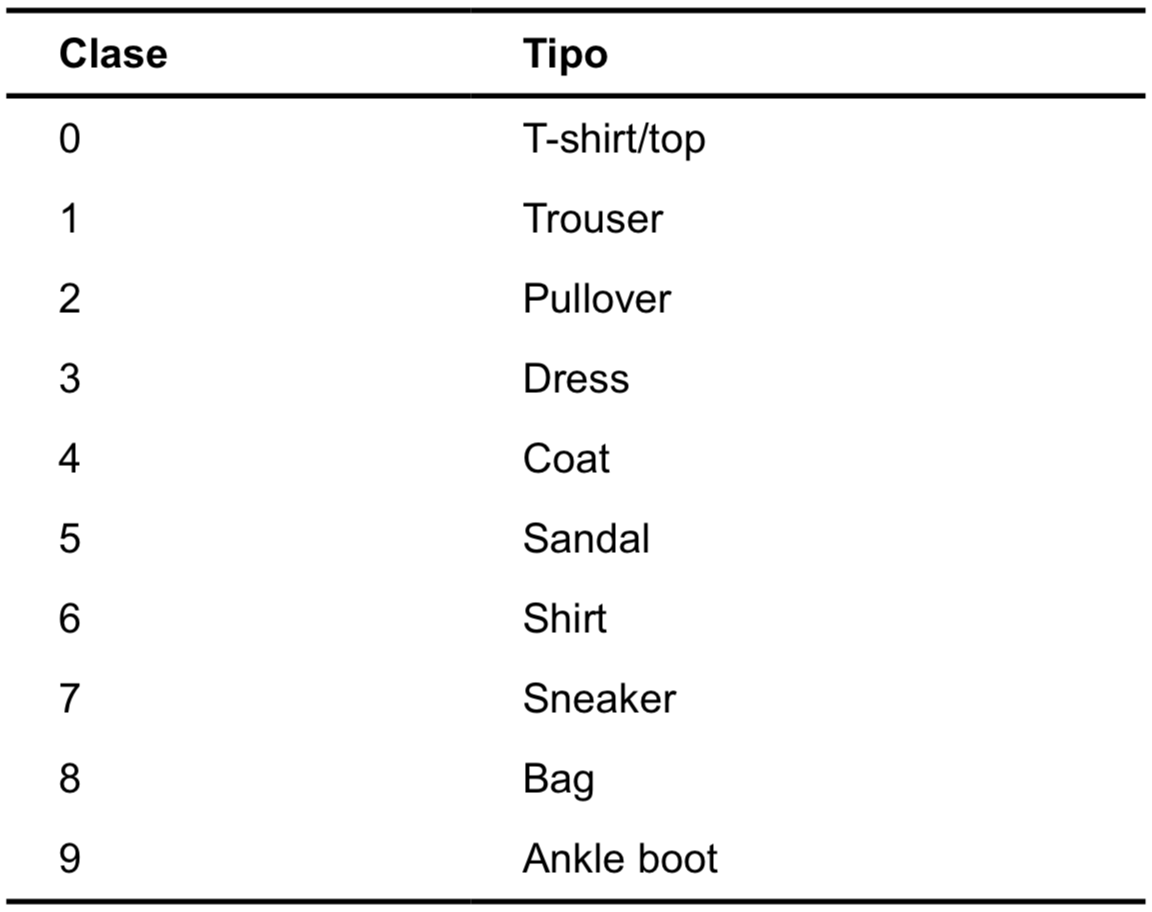

### Dado que los nombres de clase no se incluyen con el conjunto de datos, podemos crear una lista con ellos para usarlos más adelante al visualizar las imágenes:

In [32]:
# Clases de ropa consideradas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
# Vamos a escalar los valores de entrada en el rango 0-1
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0


In [34]:
# Recordar que es una buena práctica comprobar que los datos tienen la forma que esperamos

print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [35]:
# y que las muestras y etiquetas son los valores que esperamos
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

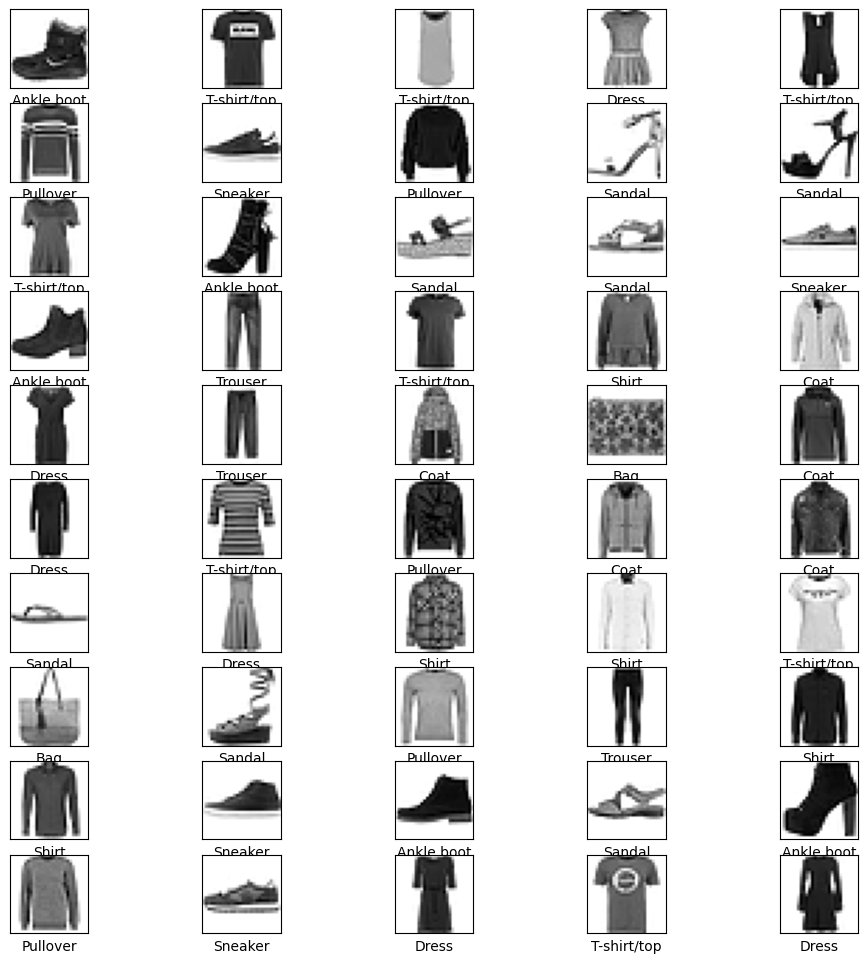

In [36]:
# Visualización las 50 primeras imágenes del conjunto de datos Fashion-MNIST
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Paso 2: Definimos la arquitectura de la red neuronal**

Tened en cuenta que Keras nos facilita el paso de reconvertir las muestras de entrada de 28×28 a un vector (array) de 784 números (concatenando fila a fila) con el uso de la capa *keras.layers.Flatten()*. Podemos comprobar con el método *summary()* que esta capa no requiere parámetros para aplicar la transformación (columna Param #). En general, siempre usaremos esta capa del modelo para hacer esta operación en lugar de redimensionar el tensor de datos antes de la entrada.


In [37]:
# Cargamos las librerías necesarias para configurar la red

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [38]:
# Definimos la arquitectura de la red utilizada
model = Sequential()
# DEFINIR LA RED
model.add(Flatten(input_shape=(28, 28)))  # Convierte las imágenes de 28x28 en un vector de 784
model.add(Dense(128, activation='relu'))  # Capa oculta con 128 neuronas y función de activación 'relu'
model.add(Dense(10, activation='softmax'))  # Capa de salida con 10 neuronas para las 10 clases


In [39]:
# Hacemos un summary de la red considerada
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Paso 3: Compilamos la arquitectura de la red neuronal definida**

Antes de que el modelo esté listo para ser entrenado, se requiere especificar el valor de algunos argumentos del método de compilación. Los parámetros que utilizamos son los conocidos para este tipo de problemas de clasificación multiclase. En particular, recordar que en este paso se especifica la función de coste (loss) que dirige el entrenamiento del modelo en la dirección correcta durante el proceso de entrenamiento. También especificamos el tipo de optimización que usaremos para actualizar los parámetros del modelo durante el proceso de aprendizaje. Y, finalmente, se indica la métrica que se usará para monitorizar los pasos de entrenamiento y testing. En este ejercicio nuevamente proponemos usar la precisión (accuracy), es decir, la fracción de las imágenes que están clasificadas correctamente.

In [40]:
# Compilamos el modelo con SGD
# A COMPLETAR POR EL ALUMNO
model.compile(optimizer='sgd',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


**Paso 4: Entrenamiento del modelo de red neuronal utilizado**

Ahora el modelo ya está listo para entrenar mediante el método fit(), actualizando los parámetros de tal manera que aprenda a asociar imágenes a etiquetas. Como se puede observar, a medida que el modelo entrena, se muestran las métricas de loss y accuracy.

En este caso (pueden cambiar los valores cuando ustedes lo probéis) este modelo alcanza una precisión de, aproximadamente, 0.7951 (o 79.5 %) en los datos de entrenamiento, pasando todas las imágenes por la red neuronal 5 veces (5 épocas, o epochs).

In [41]:
# Realizamos el proceso de entrenamiento sobre el conjunto de train
# A COMPLETAR POR EL ALUMNO
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - accuracy: 0.6778 - loss: 1.0160
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.8201 - loss: 0.5323
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.8366 - loss: 0.4742
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.8428 - loss: 0.4558
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.8495 - loss: 0.4319


**Paso 5: Evaluación del modelo de red neuronal utilizado**

El siguiente paso es comparar el rendimiento del modelo en el conjunto de datos de prueba. Vemos que es aproximadamente la misma precisión que en los datos de entrenamiento. Buenas noticias!! No existe el sobreajuste.

In [42]:
# Realizamos el proceso de validación sobre el conjunto de test con model.evaluate para obtener pérdida y accuracy
# A COMPLETAR POR EL ALUMNO
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8447 - loss: 0.4481


In [43]:
# Obtenemos por pantalla el resultado
print('Test accuracy:', test_acc)

Test accuracy: 0.8427000045776367


**Paso 6: Predicciones del modelo de red neuronal utilizado**

Con el modelo entrenado, podemos empezar a usarlo para hacer predicciones sobre algunas imágenes (usemos por comodidad alguna de las imágenes de prueba que ya tenemos cargadas en el notebook). En predictions vamos a almacenar la predicción de la etiqueta para cada imagen en el conjunto de prueba. Echemos un vistazo a la primera predicción:

In [44]:
# Guardamos las predicciones realizadas sobre el conjunto de test
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step


In [45]:
# Obtenemos la información sobre una de las predicciones obtenidas
predictions[5]

array([3.3485147e-03, 9.9006701e-01, 2.7452619e-04, 1.1995478e-03,
       4.9992222e-03, 2.1272297e-07, 6.6453969e-05, 1.8977412e-06,
       4.2479787e-05, 7.2952737e-08], dtype=float32)

In [46]:
# Se puede ver qué etiqueta tiene el valor de confianza más alto con la función argmax
np.argmax(predictions[5])

1

El modelo está más seguro de que esta imagen son unos pantalones (Trouser) ya que nos reporta una clase igual a 1. Al examinar la etiqueta que le corresponde muestra que esta clasificación es correcta ya que es igual a 1 también.

In [47]:
test_labels[5]

1

**Paso 7: Mejora del modelo de red neuronal utilizado**

Podemos observar que la precisión obtenida de este modelo para estos datos (75 %) dista mucho de ser la mejor de las que podemos obtener. Tener en cuenta que no hay una solución única para todos los problemas, sino que cada problema requiere su propia solución. Intentemos, por ejemplo, cambiar el optimizador usado.

Recordemos que el optimizador es el algoritmo usado por el modelo para actualizar los pesos de cada una de sus capas en el proceso de entrenamiento. Una elección bastante habitual es el optimizador *sgd*, pero hay más como sabemos, como por ejemplo el optimizador *Adam*, que a veces puede hacer converger mejor el proceso de optimización. Vamos a probar.

In [48]:
# Definimos la arquitectura de la red que queremos mejorar
model = Sequential()
# A COMPLETAR POR EL ALUMNO
#model.add(Flatten(input_shape=(28, 28)))
#model.add(Dense(128, activation='sigmoid')) # le he subido las neuronas a 128 sobre las 10 que soliamos usar dado que dispongo de buena maquina para realizar estos ejercicios y si no, el aqccuracy quedaria inferior al anterior usado
#model.add(Dense(10, activation='softmax'))

#vamos a experimentar un poco con la red, añadiendo capas de dropout y cambiando la función de activación de la primera capa
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu')) # usamos relu en lugar de sigmoid 
model.add(Dropout(0.5)) #añadimos una capa de dropout para evitar el overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu')) 
model.add(Dense(10, activation='softmax'))


In [49]:
# Compilamos el modelo de la red que queremos mejorar con ADAM
# A COMPLETAR POR EL ALUMNO
model.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [50]:
# Realizamos el proceso de entrenamiento sobre el conjunto de train considerando el nuevo modelo de red neuronal
#model.fit(train_images, train_labels, epochs=5)

#Vamos a experimentar un poco tamibien con esta parte
#Implementamos la parada temprana para evitar el overfitting
#En este caso vamos a seleccionar una paciencia de 3 epochs, para que en caso de que no mejore el modelo en 3 epochs, se detenga el entrenamiento y asi evitamos el overfitting
early = EarlyStopping(monitor='val_loss', patience=3)
model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels), callbacks=[early])


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5798 - loss: 1.1049 - val_accuracy: 0.8049 - val_loss: 0.5240
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7744 - loss: 0.6207 - val_accuracy: 0.8349 - val_loss: 0.4549
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8060 - loss: 0.5534 - val_accuracy: 0.8310 - val_loss: 0.4584
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8146 - loss: 0.5241 - val_accuracy: 0.8431 - val_loss: 0.4387
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8209 - loss: 0.5077 - val_accuracy: 0.8453 - val_loss: 0.4276
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8274 - loss: 0.4855 - val_accuracy: 0.8535 - val_loss: 0.4183
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8308 - loss: 0.4774 - val_accuracy: 0.8520 - val_loss: 0.4092
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8337 - loss: 0.4659 - 

In [51]:
# Realizamos el proceso de validación sobre el conjunto de test el nuevo modelo de red neuronal
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.8580 - loss: 0.3862


In [52]:
# Obtenemos por pantalla el resultado
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8565000295639038


Como vemos, cambiando solo el optimizador ya hemos mejorado casi un 9 % adicional la precisión del modelo. Esto nos hace pensar que hay muchos elementos a tener en cuenta cuando definimos y configuramos el proceso de aprendizaje de una red neuronal. Lo cual nos ofrece motivación para continuar probando con diferentes parámetros e hiperparámetros en el proceso de aprendizaje y validación.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>